I'm a huge fan of thought experiments, and although it's by no means the freakiest of experiments, the Monty Hall problem is one I always had a hard time wrapping my head around.

If you're unfamiliar, the general premise is this: you're on [Monty Hall's game show](https://www.imdb.com/title/tt0056770/) and you have to pick one of three doors to open. One door holds a prize, the other two hold goats. Let's say the prize is a car and let's say you're the sort of person who prefers cars to goats. You have no information to go off of, so you just pick a door at random. But then Monty Hall opens one of the remaining two doors to reveal a goat. Should you pick a different door? 

You probably know by now that the answer is yes. The simplest way to think about why is to first allocate probabilities of success to each door. Since we don't have any prior information, there is a 1/3 chance of any door containing a prize. The door you first pick has a 1/3 chance of containing the car, and other other doors contain a combined 2/3 chance of containing the car. When Monty opens one of the doors to reveal a goat, the remaining door takes on the full 2/3 probability of containing a car. Therefore, the probability you win with your current door is 1/3 and the probability you win if you change doors is 2/3.

I wanted to test this solution out by running a ton of trials and seeing what the long term success rate of either choice is.

In [9]:
import random
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np

I built a function that tracks the cumulative probability of staying with the same door or switching. The function picks a door at random to contain the prize. It then picks a door at random. Once one of the non-chosen doors is revealed to not contain the prize, the function notes whether it would win by staying with its current door or by choosing a different door.

In [6]:
def plot_data(change_probs, stay_probs):
    """
    This function plots two success percentage vectors from 
    the Monty Hall function. The output is one plot file.
    """
    
    axis_points = np.linspace(0,1, num = 11)
    
    fig, ax = plt.subplots()
    ax.plot(change_probs, 'b-', stay_probs, 'r-')
    ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
    ax.axhline(y=0.67)
    ax.axhline(y=0.33)
    plt.xlabel('Number of Trials')
    plt.ylabel('Total successes')
    plt.title('Monty Hall Problem')
    plt.legend(('Change Doors', 'Don\'t Change Doors'))
    plt.yticks(axis_points)
    
    return fig

def monty_hall(trials = 1000):
    """
    This program tracks the result of the classic Monty Hall problem.
    It compares the actual percentage of success if you switch doors vs. if 
    you stick with the orignal choice. 
    If the Monty Hall solution is correct, then your probability of choosing the winning 
    door should be 2/3 if you switch your choice, and 1/3 if you don't.
    The output is two vectors showing the proportion of success in either scenario
    given the pre-specified number of trials and a chart showing the results.
    """
    #List for win or not results if you switch
    change_result = []
    #List for proportion of current number of wins and losses
    change_probs = []
    #similar lists as above assuming door choice is not switched
    stay_result = []
    stay_probs = []
    
    counter = 0
    
    while counter < trials:
        #reset the doors so all are blank and then assign one at random to take a value of 1
        #1 indicates a win, 0 indicates a loss
        doors = [0,0,0]
        rand_no = random.randint(0,2)
        doors[rand_no] = 1
        
        #Pick a door at random - at this stage you have 1/3 probability of being right so random is fine
        selected_door = random.randint(0,2)
        
        #Monty hall reveals a door that's not a winner
        #The code does this by cycling through the two remaning doors and picking one that's not a winner
        if doors[selected_door-1] != 1:
            opened_door = selected_door-1
        elif doors[selected_door-2] !=1:
            opened_door = selected_door-2
            
        #Now remove the two doors to leave only one result
        #Track what the result is if you stayed
        initial_door_result  = doors.pop(selected_door)        
        doors.pop(opened_door)
        #There's only one door left
        new_door_result = doors[0]
                
        #add results of changing door selection
        change_result.append(new_door_result)
        #calculate the percentage of times the correct door was selected
        current_percent = sum(change_result)/len(change_result)
        change_probs.append(current_percent)
       
        #add results of not changing door selection
        stay_result.append(initial_door_result)
        stay_percent = sum(stay_result)/len(stay_result)          
        stay_probs.append(stay_percent)
                
        counter+=1
    
    #create graph showing results
    charted = plot_data(change_probs, stay_probs)
    
    return(change_probs, 
           stay_probs, 
           charted)        

I ran 1000 different trials and, when I plotted the results, I saw that over time the probabilities of winning by changing doors converged to 67% and the probabilities of winning by not changing doors converged to 33% - exactly what I expected to see. )The two horizantal lines in the chart indicate the respective probabilities.)

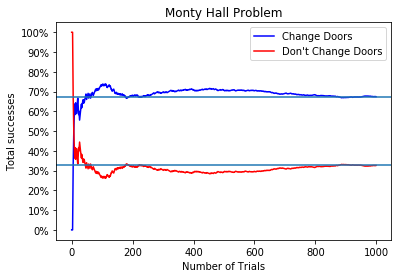

In [7]:
[change_probs, stay_probs, charted]= monty_hall(trials = 1000)


So there you have it. The math may seem weird or counterintuitive, but if you run this trial enough times you'll see that we got exactly the expected result.

One of my favourite things about programming is being able to run experiments like this. Unfortunately, there's no chance I could go on Monty Hall's show 1,000 times so being able to simulate these results is very exciting.